# Predicting House Prices using Regression Algorithms

## Import Libraries and Load Csv files

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./allBoston.csv')

In [3]:
df.head(10)

,city,price,bed,bath,size
0,Boston,5495000,5,5.0,4068
1,Boston,7950000,3,5.0,4211
2,Boston,269900,2,2.0,722
3,Boston,20500000,5,5.0,7610
4,Boston,324900,3,2.0,1520
5,Boston,399000,1,1.0,367
6,Boston,649900,4,2.0,1900
7,Boston,1245000,4,3.0,2800
8,Boston,500000,3,2.0,1591
9,Boston,25000000,5,9.0,9768


In [4]:
price = df['price']

### Check for correlations of dataframe

In [5]:
df.corr()

,price,bed,bath,size
price,1.000000,0.105464,0.122639,0.521546
bed,0.105464,1.000000,0.223928,0.735550
bath,0.122639,0.223928,1.000000,0.265971
size,0.521546,0.735550,0.265971,1.000000


### Plot datasets using heatmap

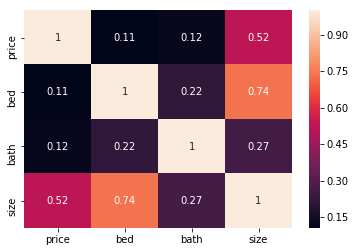

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.heatmap(df.corr(), annot=True)
plt.show()
plt.clf()

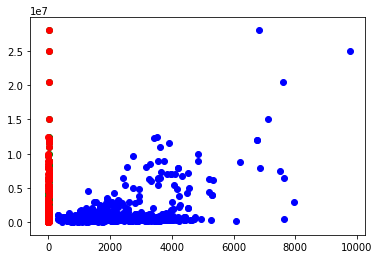

In [7]:
plt.scatter(df.loc[:,["size"]],price,c='b')
plt.scatter(df.loc[:,["bath"]],price,c='g')
plt.scatter(df.loc[:,["bed"]],price, c='r')
plt.show()

### Print pairplot of dataframe

We noticed that the data sets is right skewed for all of our columns so we need to perform a log transformation

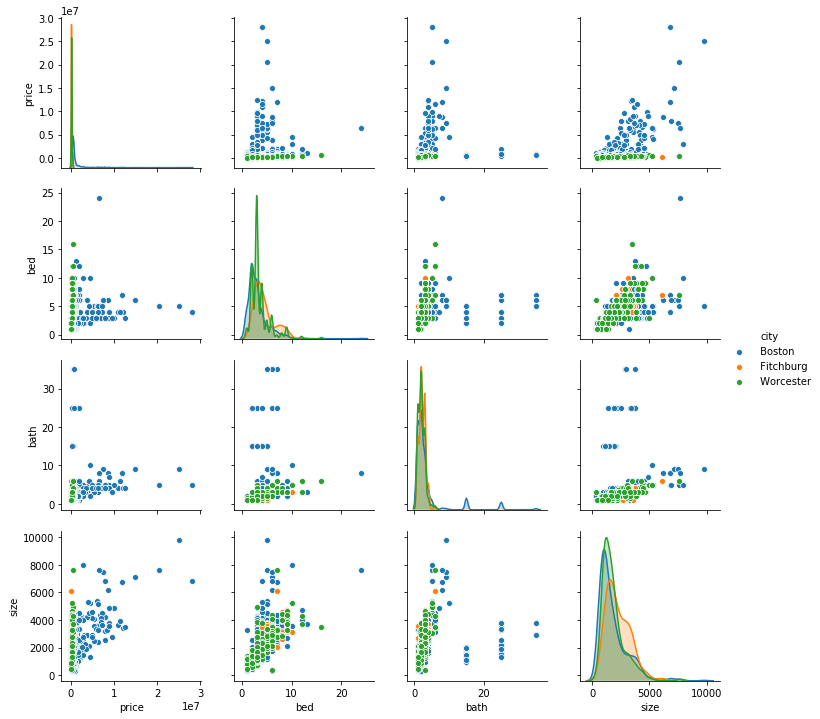

In [8]:
sns.pairplot(df, hue="city");


### Perform log transformation of data

In [9]:
import numpy as np # Solving skewness of graph
df['bed'] = np.log10(df['bed'])
df['bath'] = np.log10(df['bath'])
df['price'] = np.log10(df['price'])
df['size'] = np.log10(df['size'])
# Drop the non-transformed columns
# df = df.drop(columns = ['pop', 'gdp_per_cap'])

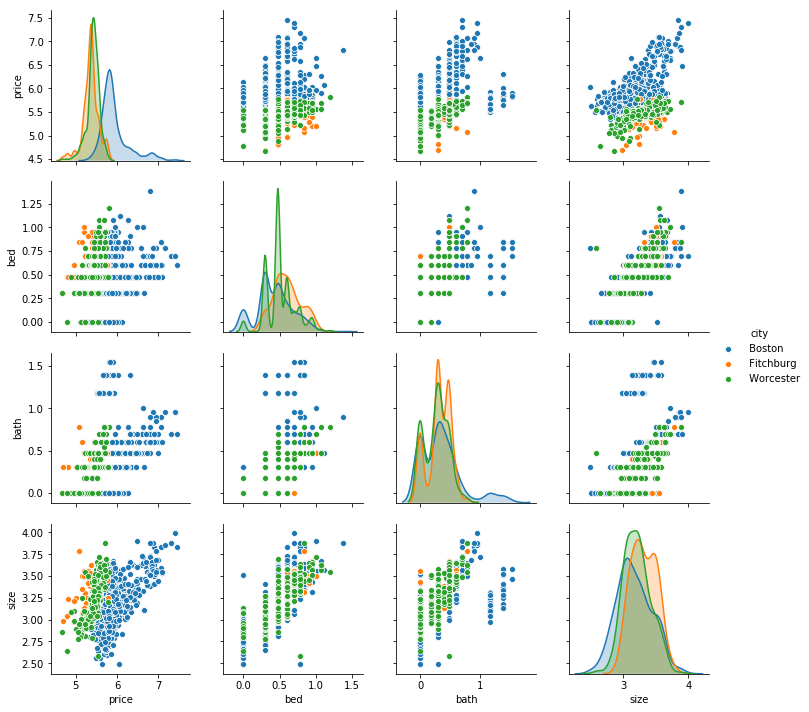

In [10]:
sns.pairplot(df, hue="city"); ## Plot new graph

#### We fixed the problem of right skewed and ensure that our data is centered around the mean

### Get dummies for the City names

In [11]:
dummy = pd.get_dummies(df,prefix_sep='_')

In [12]:
y = dummy.iloc[:,0].values ## Get x and y values
X = dummy.iloc[:,1:].values

Split data into train and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [14]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train.reshape(1,-1))


### Perform Linear regression using our train data

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# y_train=y_train.reshape((904,1))
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predict datasets using regressor

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
import pickle
with open("linearregression.pkl", "wb") as f:
    pickle.dump(regressor, f)

In [18]:
y_pred.shape

(227,)

### Perform score evaluations

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) ## Old model without log transform

0.6574991575963992

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) # new model result with log transform

0.6574991575963992

### Perform Support Vector Regression on datasets

In [21]:
from sklearn.svm import SVR

In [22]:
supportvector = SVR(C=1.0, epsilon=0.2)
supportvector.fit(X_train, y_train)

/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
with open("supportvector.pkl", "wb") as f:
    pickle.dump(supportvector, f)

In [24]:
y_svr = supportvector.predict(X_test)

In [25]:
r2_score(y_test,y_svr) ## SVR performs better

0.711899557492724

### Perform Random Forest Regression on datasets

In [26]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor = RandomForestRegressor(n_estimators=300, random_state=0)
randomForestRegressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [27]:
with open("randomForestRegressor.pkl", "wb") as f:
    pickle.dump(randomForestRegressor, f)

In [28]:
y_r = randomForestRegressor.predict(X_test)

In [29]:
r2_score(y_test,y_r)

0.8035943071078426

In [30]:
dummy

,price,bed,bath,size,city_ Boston,city_ Fitchburg,city_ Worcester
0,6.739968,0.698970,0.698970,3.609381,1,0,0
1,6.900367,0.477121,0.698970,3.624385,1,0,0
2,5.431203,0.301030,0.301030,2.858537,1,0,0
3,7.311754,0.698970,0.698970,3.881385,1,0,0
4,5.511750,0.477121,0.301030,3.181844,1,0,0
5,5.600973,0.000000,0.000000,2.564666,1,0,0
6,5.812847,0.602060,0.301030,3.278754,1,0,0
7,6.095169,0.602060,0.477121,3.447158,1,0,0
8,5.698970,0.477121,0.301030,3.201670,1,0,0
9,7.397940,0.698970,0.954243,3.989806,1,0,0


In [31]:
np.e**7.72544484885044

2265.260061692614

In [32]:
df

,city,price,bed,bath,size
0,Boston,6.739968,0.698970,0.698970,3.609381
1,Boston,6.900367,0.477121,0.698970,3.624385
2,Boston,5.431203,0.301030,0.301030,2.858537
3,Boston,7.311754,0.698970,0.698970,3.881385
4,Boston,5.511750,0.477121,0.301030,3.181844
5,Boston,5.600973,0.000000,0.000000,2.564666
6,Boston,5.812847,0.602060,0.301030,3.278754
7,Boston,6.095169,0.602060,0.477121,3.447158
8,Boston,5.698970,0.477121,0.301030,3.201670
9,Boston,7.397940,0.698970,0.954243,3.989806


In [49]:
bs = pd.read_csv('./allBoston.csv')
pricelocation = bs.iloc[:,0:2]

In [51]:
ag = pricelocation.groupby(by='city').price.sum().sort_index()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f126630>]],
      dtype=object)

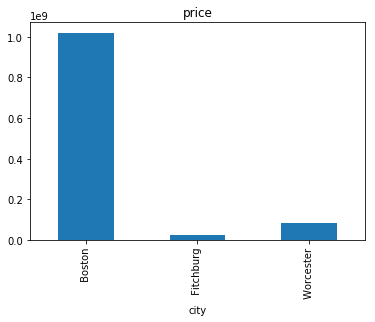

In [56]:
ag.plot(kind='bar', subplots=True, layout=(1,1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a200a06d8>,
      dtype=object)

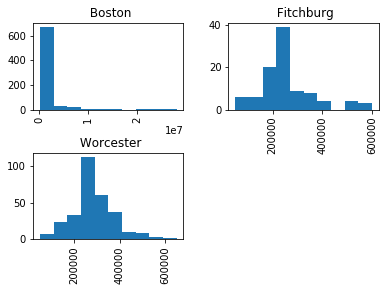

In [57]:
bs.hist(by='city', column = 'price')

In [ ]:
`